OBSERVISNG POCKET ALGORITHM

In [ ]:
import numpy as np
import matplotlib . pyplot as plt 
from sklearn . datasets import make_blobs 

In [ ]:
c = 3 * np.random.normal(0, 1, (2, 2))
X, y = make_blobs(n_samples=100, centers=c , n_features=2, cluster_std=1.0, shuffle=False , random_state=0)
y[y==0] = -1

<function matplotlib.pyplot.show>

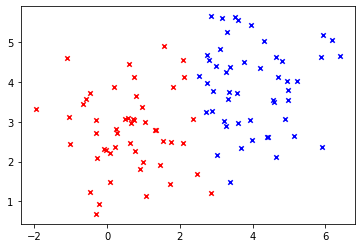

In [ ]:
c0=plt.scatter(X[y==-1,0], X[y==-1,1], s=20, color='r', marker='x')
c1=plt.scatter(X[y==1,0], X[y==1,1], s=20, color='b', marker='x')
plt.show

In [ ]:
def normalize(x_r,c):
    for i in range(len(x_r)):
        for j in range(len(x_r[0])):
            if i<(len(x_r)//2) and j==0:
                x_r[i][j]=x_r[i][j]+c[0][0]
            elif i<(len(x_r)//2) and j==1:
                x_r[i][j]=x_r[i][j]+c[0][1]
            elif i>(len(x_r)//2) and j==0:
                x_r[i][j]=x_r[i][j]+c[1][0]
            elif i>(len(x_r)//2) and j==1:
                x_r[i][j]=x_r[i][j]+c[1][1]
        
    return x_r 

In [ ]:
X= normalize(X,c)
print(X)

[[ 2.94869984  5.72835667]
 [ 2.16338547  7.56909266]
 [ 3.05220548  4.35092158]
 [ 2.13473591  5.17684225]
 [ 1.08142864  5.73879796]
 [ 1.32869106  6.78247296]
 [ 1.94568522  5.44987447]
 [ 1.62851072  5.66187378]
 [ 2.67872656  5.12304119]
 [ 1.49771519  4.47410372]
 [-1.36834233  5.98181805]
 [ 2.04908369  4.58603444]
 [ 3.45440211  3.87383378]
 [ 1.23040601  5.14101561]
 [ 2.7174267   6.79755823]
 [ 1.33959492  5.70636198]
 [ 0.29686174  3.34740299]
 [ 0.83673534  5.48454843]
 [ 2.41493817  6.53057931]
 [ 0.79732067  5.02589671]
 [ 0.13609453  3.90818152]
 [-0.5216227   7.27897485]
 [ 0.67499531  4.89012516]
 [-0.06814787  6.10568981]
 [-0.42925036  5.11545918]
 [ 0.28918093  5.71510195]
 [ 0.67384235  4.14756727]
 [ 1.15646526  5.75653133]
 [ 1.25116471  5.63067135]
 [ 0.5503254   4.96545829]
 [ 0.51218704  4.9686463 ]
 [ 0.37150121  3.60191685]
 [ 1.36207363  4.92641852]
 [-0.44555086  5.79098171]
 [ 0.27734913  5.38014485]
 [ 1.91373805  5.45718237]
 [ 2.32404818  4.09337364]
 

In [ ]:
x_add = [1 for i in range(100)]
x1 = np.array(x_add)
x = np.insert(X, 0, x1, axis=1)
y= np.array(y)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3,random_state=42)

In [ ]:
train_list = np.insert(X_train, 3, y_train, axis=1)

In [ ]:
def sampleError(w_list,n_list,X_train,y_train,d):
    miss=0
    for i in range(len(X_train)):
        x_i=n_list[i]
        activation=0
        for j in range(d+1):
            activation= activation+w_list[j]*x_i[j]
            if activation >= 0:
                y_pred = 1
            else:
                y_pred = -1
        if y_pred!=y_train[i]:
            miss+=1
    return miss 

In [ ]:
def pocket(n_list, d, n, X_train,y_train,limit):
    w_list=[]
    w_pocket=[]
    for i in range(d+1):
        w_list.append(0.0)
    count=0
    #update=0
    
    while count <limit:
        for i in range(len(X_train)):
            x_i=n_list[i]
            activation=0
            for j in range(d+1):
                activation= activation+w_list[j]*x_i[j]
                
                if activation >= 0:
                    y_pred = 1
                else:
                    y_pred = -1
                
                if y_pred != x_i[d+1]:
                    w_list=[(w_list[k] + x_i[d+1]* x_i[k]) for k in range(d+1)]
                    error=sampleError(w_list,n_list,X_train,y_train,d)
                    if error<n:
                        w_pocket=w_list[:]
                        n=error
        count=count+1
    return(w_pocket,n) 

In [ ]:
def outerror(w_list,n_list,X_test,y_test,d):
    miss=0
    for i in range(len(X_test)):
        x_i=n_list[i]
        activation=0
        for j in range(d+1):
            activation= activation+w_list[j]*x_i[j]
            if activation >= 0:
                y_pred = 1
            else:
                y_pred = -1
        if y_pred!=y_test[i]:
            miss+=1
    return miss

In [ ]:
in_err=[]
out_err=[]

In [ ]:
l= len(X_train)
w_pocket,error1=pocket(train_list,2,l, X_train,y_train, 50)

In [ ]:
print(error1)

0


In [ ]:
in_err.append(error1)

In [ ]:
test_list = np.insert(X_test, 3, y_test, axis=1)

In [ ]:
error2= outerror(w_pocket,test_list,X_test,y_test,2)
print(error2)
out_err.append(error2)

1


2

0
0


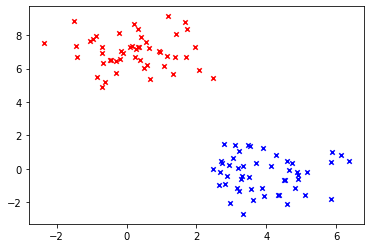

In [ ]:
c1 = 3 * np.random.normal(0, 1, (2, 2))
X1, y1 = make_blobs(n_samples=100, centers=c1 , n_features=2, cluster_std=1.0, shuffle=False , random_state=0)
y1[y1==0] = -1
plt.scatter(X1[y1==-1,0], X1[y1==-1,1], s=20, color='r', marker='x')
plt.scatter(X1[y1==1,0], X1[y1==1,1], s=20, color='b', marker='x')

for i in range(len(X1)):
    for j in range(len(X1[0])):
        if i<(len(X1)//2) and j==0:
            X1[i][j]=X1[i][j]+c1[0][0]
        elif i<(len(X1)//2) and j==1:
            X1[i][j]=X1[i][j]+c1[0][1]
        elif i>(len(X1)//2) and j==0:
            X1[i][j]=X1[i][j]+c1[1][0]
        elif i>(len(X1)//2) and j==1:
           X1[i][j]=X1[i][j]+c1[1][1]

x_add1 = [1 for i in range(100)]
x11 = np.array(x_add1)
x1 = np.insert(X1, 0, x11, axis=1)
y1= np.array(y1)

X_train1, X_test1, y_train1, y_test1 = train_test_split(x1, y1, test_size=0.3,random_state=42)

train_list1 = np.insert(X_train1, 3, y_train1, axis=1)
l= len(X_train1)
w_pocket1,in1=pocket(train_list1,2,l, X_train1,y_train1, 100)
print(in1)


test_list1 = np.insert(X_test1, 3, y_test1, axis=1)
out1= outerror(w_pocket1,test_list1,X_test1,y_test1,2)
print(out1)


In [ ]:
in_err.append(in1)
out_err.append(out1)

0
0


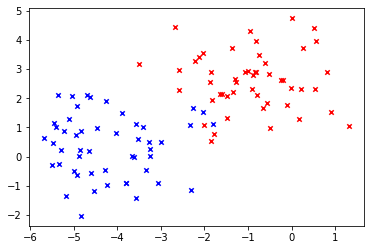

In [ ]:
c2 = 3 * np.random.normal(0, 1, (2, 2))
X2, y2 = make_blobs(n_samples=100, centers=c2 , n_features=2, cluster_std=1.0, shuffle=False , random_state=0)
y2[y2==0] = -1
plt.scatter(X2[y2==-1,0], X2[y2==-1,1], s=20, color='r', marker='x')
plt.scatter(X2[y2==1,0], X2[y2==1,1], s=20, color='b', marker='x')


X2= normalize(X2,c2)


x_add2 = [1 for i in range(100)]
x12 = np.array(x_add2)
x2 = np.insert(X2, 0, x12, axis=1)
y2= np.array(y2)

X_train2, X_test2, y_train2, y_test2 = train_test_split(x2, y2, test_size=0.3,random_state=42)

train_list2 = np.insert(X_train2, 3, y_train2, axis=1)
l= len(X_train2)
w_pocket2,in2=pocket(train_list2,2,l, X_train2,y_train2, 500)
print(in2)


test_list2 = np.insert(X_test2, 3, y_test2, axis=1)
out2= outerror(w_pocket2,test_list2,X_test2,y_test2,2)
print(out2)


In [ ]:
in_err.append(in2)
out_err.append(out2)

0
0


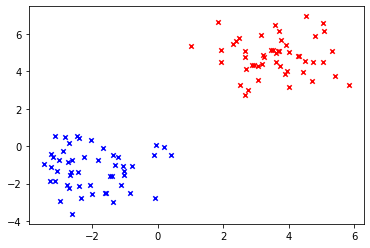

In [ ]:
c3 = 3 * np.random.normal(0, 1, (2, 2))
X3, y3 = make_blobs(n_samples=100, centers=c3 , n_features=2, cluster_std=1.0, shuffle=False , random_state=0)
y3[y3==0] = -1
plt.scatter(X3[y3==-1,0], X3[y3==-1,1], s=20, color='r', marker='x')
plt.scatter(X3[y3==1,0], X3[y3==1,1], s=20, color='b', marker='x')
X3= normalize(X3,c3)

x_add3 = [1 for i in range(100)]
x13 = np.array(x_add3)
x3 = np.insert(X3, 0, x13, axis=1)
y3= np.array(y3)

X_train3, X_test3, y_train3, y_test3 = train_test_split(x3, y3, test_size=0.3,random_state=42)

train_list3 = np.insert(X_train3, 3, y_train3, axis=1)
l= len(X_train3)
w_pocket3,in3=pocket(train_list3,2,l, X_train3,y_train3, 1000)
print(in3)


test_list3 = np.insert(X_test3, 3, y_test3, axis=1)
out3= outerror(w_pocket3,test_list3,X_test3,y_test3,2)
print(out3)


In [ ]:
in_err.append(in3)
out_err.append(out3)

0
0


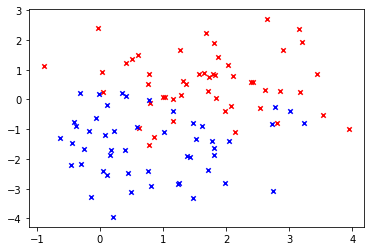

In [ ]:
c4 = 3 * np.random.normal(0, 1, (2, 2))
X4, y4 = make_blobs(n_samples=100, centers=c4 , n_features=2, cluster_std=1.0, shuffle=False , random_state=0)
y4[y4==0] = -1
c0=plt.scatter(X4[y4==-1,0], X4[y4==-1,1], s=20, color='r', marker='x')
c1=plt.scatter(X4[y4==1,0], X4[y4==1,1], s=20, color='b', marker='x')
X4= normalize(X4,c4)
x_add4 = [1 for i in range(100)]
x14 = np.array(x_add4)
x4 = np.insert(X4, 0, x14, axis=1)
y4= np.array(y4)

X_train4, X_test4, y_train4, y_test4 = train_test_split(x4, y4, test_size=0.3,random_state=42)

train_list4 = np.insert(X_train4, 3, y_train4, axis=1)
l= len(X_train4)
w_pocket4,in4=pocket(train_list4,2,l, X_train4,y_train4, 3000)
print(in4)


test_list4 = np.insert(X_test4, 3, y_test4, axis=1)
out4= outerror(w_pocket4,test_list4,X_test4,y_test4,2)
print(out4)


In [ ]:
in_err.append(in4)
out_err.append(out4)

In [ ]:
print(in_err)

[0, 0, 0, 0, 0]


In [ ]:
print(out_err)

[1, 0, 0, 0, 0]


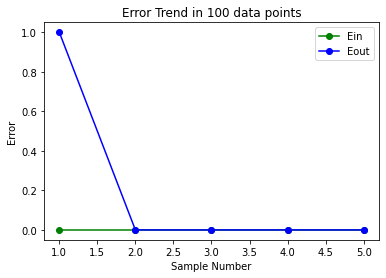

In [ ]:
itr=[1,2,3,4,5]
plt.plot(itr, in_err, 'o-g')
plt.plot(itr, out_err, 'o-b')
plt.xlabel("Sample Number")
plt.ylabel("Error")
plt.title("Error Trend in 100 data points")
plt.legend(['Ein', 'Eout'])
plt.show()

In [ ]:
from statistics import mean
em=mean(in_err)
om=mean(out_err)
print(em,om)

0 0.2


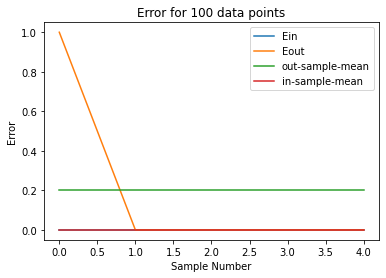

In [ ]:
import pandas as pd
df = pd.DataFrame({
       'Ein': in_err,
       'Eout': out_err,
       'out-sample-mean': [om for i in range(len(out_err))],
       'in-sample-mean': [em for i in range(len(in_err))]})

df.plot()
plt.xlabel("Sample Number")
plt.ylabel("Error")
plt.title("Error for 100 data points")
plt.show()

PLA

In [ ]:
n_list = np.insert(x, 3, y, axis=1)
print(n_list)

[[  1.          -7.24300423   3.43809825  -1.        ]
 [  1.          -8.0283186    5.27883424  -1.        ]
 [  1.          -7.13949859   2.06066316  -1.        ]
 [  1.          -8.05696816   2.88658383  -1.        ]
 [  1.          -9.11027543   3.44853954  -1.        ]
 [  1.          -8.86301301   4.49221455  -1.        ]
 [  1.          -8.24601885   3.15961606  -1.        ]
 [  1.          -8.56319335   3.37161537  -1.        ]
 [  1.          -7.51297751   2.83278278  -1.        ]
 [  1.          -8.69398888   2.1838453   -1.        ]
 [  1.         -11.5600464    3.69155964  -1.        ]
 [  1.          -8.14262038   2.29577602  -1.        ]
 [  1.          -6.73730196   1.58357537  -1.        ]
 [  1.          -8.96129806   2.85075719  -1.        ]
 [  1.          -7.47427737   4.50729981  -1.        ]
 [  1.          -8.85210915   3.41610356  -1.        ]
 [  1.          -9.89484233   1.05714457  -1.        ]
 [  1.          -9.35496873   3.19429001  -1.        ]
 [  1.    

In [ ]:
def perceptron(n_list, d):
    w_list=[]
    for i in range(d+1):
        w_list.append(0.0)
    count=0
    #update=0
    
    while count <4000:
        for i in range(100):
            x_i=n_list[i]
            activation=0
            for j in range(d+1):
                activation= activation+w_list[j]*x_i[j]
                
                if activation >= 0:
                    y_pred = 1
                else:
                    y_pred = -1
                
                if y_pred != x_i[d+1]:
                    w_list=[(w_list[k] + x_i[d+1]* x_i[k]) for k in range(d+1)]
                    #update= update+1
        count=count+1
    #print("Update:", update)
    return(w_list)   

In [ ]:
def line(m,c,x):
    x= np.arange(-10, x)
    y = m*x + c
    return x,y

In [ ]:
def line1(w):
    m= -w[1]/w[2]
    c= -w[0]/w[2]
    x,y= line(m,c,10)
    return x,y

In [ ]:
w= perceptron(n_list,2)

In [ ]:
x_line,y_line= line1(w)

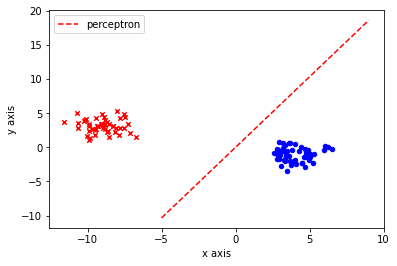

In [ ]:
plt.plot(x_line, y_line, '--', label='perceptron', color='red')
plt.scatter(X[y==-1,0], X[y==-1,1], s=20, color='r', marker='x')
plt.scatter(X[y==1,0], X[y==1,1], s=20, color='b', marker='o')
plt.xlabel("x axis")
plt.ylabel("y axis")
plt.legend()
plt.show()

Pocket-1

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3,random_state=42)

In [ ]:
print(X_train)

[[  1.          -8.14262038   2.29577602]
 [  1.          -8.65069018   3.74451421]
 [  1.           5.01992366  -0.91628895]
 [  1.          -8.94053936   3.34041294]
 [  1.           2.9946815   -1.18285152]
 [  1.          -8.86301301   4.49221455]
 [  1.           3.42473217  -1.20318604]
 [  1.           3.32914876  -0.69576741]
 [  1.          -8.27796602   3.16692395]
 [  1.          -9.89484233   1.05714457]
 [  1.          -8.88014449   3.43993041]
 [  1.          -9.91435494   3.08988644]
 [  1.          -8.56319335   3.37161537]
 [  1.           2.80620793  -0.96796573]
 [  1.          -9.03523881   3.46627291]
 [  1.          -9.3943834    2.73563829]
 [  1.           5.04848564  -1.14746536]
 [  1.          -9.90252314   3.42484354]
 [  1.           3.40449698  -1.38465114]
 [  1.          -8.96129806   2.85075719]
 [  1.         -10.62095443   2.82520076]
 [  1.          -8.05696816   2.88658383]
 [  1.          -9.35496873   3.19429001]
 [  1.          -9.87785373   2.45

In [ ]:
print(y_train)

[-1 -1  1 -1  1 -1  1  1 -1 -1 -1 -1 -1  1 -1 -1  1 -1  1 -1 -1 -1 -1 -1
 -1  1 -1  1 -1  1  1  1  1 -1  1  1 -1  1  1  1  1 -1  1 -1  1  1  1 -1
  1  1  1  1 -1 -1 -1  1 -1 -1 -1  1  1  1  1  1 -1  1  1 -1  1  1]


In [ ]:
train_list = np.insert(X_train, 3, y_train, axis=1)
print(train_list)

[[  1.          -8.14262038   2.29577602  -1.        ]
 [  1.          -8.65069018   3.74451421  -1.        ]
 [  1.           5.01992366  -0.91628895   1.        ]
 [  1.          -8.94053936   3.34041294  -1.        ]
 [  1.           2.9946815   -1.18285152   1.        ]
 [  1.          -8.86301301   4.49221455  -1.        ]
 [  1.           3.42473217  -1.20318604   1.        ]
 [  1.           3.32914876  -0.69576741   1.        ]
 [  1.          -8.27796602   3.16692395  -1.        ]
 [  1.          -9.89484233   1.05714457  -1.        ]
 [  1.          -8.88014449   3.43993041  -1.        ]
 [  1.          -9.91435494   3.08988644  -1.        ]
 [  1.          -8.56319335   3.37161537  -1.        ]
 [  1.           2.80620793  -0.96796573   1.        ]
 [  1.          -9.03523881   3.46627291  -1.        ]
 [  1.          -9.3943834    2.73563829  -1.        ]
 [  1.           5.04848564  -1.14746536   1.        ]
 [  1.          -9.90252314   3.42484354  -1.        ]
 [  1.    

In [ ]:
def sampleError(w_list,n_list,X_train,y_train,d):
    miss=0
    for i in range(len(X_train)):
        x_i=n_list[i]
        activation=0
        for j in range(d+1):
            activation= activation+w_list[j]*x_i[j]
            if activation >= 0:
                y_pred = 1
            else:
                y_pred = -1
        if y_pred!=y_train[i]:
            miss+=1
    return miss  

In [ ]:
def pocket(n_list, d, n, X_train,y_train):
    w_list=[]
    w_pocket=[]
    for i in range(d+1):
        w_list.append(0.0)
    count=0
    #update=0
    
    while count <1000:
        for i in range(len(X_train)):
            x_i=n_list[i]
            activation=0
            for j in range(d+1):
                activation= activation+w_list[j]*x_i[j]
                
                if activation >= 0:
                    y_pred = 1
                else:
                    y_pred = -1
                
                if y_pred != x_i[d+1]:
                    w_list=[(w_list[k] + x_i[d+1]* x_i[k]) for k in range(d+1)]
                    error=sampleError(w_list,n_list,X_train,y_train,d)
                    if error<n:
                        w_pocket=w_list[:]
                        n=error
        count=count+1
    return(w_pocket,n) 

In [ ]:
l= len(X_train)
w_pocket,error1=pocket(train_list,2,l, X_train,y_train)

In [ ]:
print(error1)

0


In [ ]:
print(w_pocket)

[-1.0, 8.142620380903642, -2.295776021652322]


In [ ]:
test_list = np.insert(X_test, 3, y_test, axis=1)
print(test_list)

[[  1.           3.09884949  -2.7797877    1.        ]
 [  1.           3.68544585  -1.98247141   1.        ]
 [  1.           2.60780724  -0.7956249    1.        ]
 [  1.          -9.41023353   4.26038611  -1.        ]
 [  1.         -10.0778092    4.09239277  -1.        ]
 [  1.          -9.31860911   3.09410638  -1.        ]
 [  1.          -9.51670876   2.59986674  -1.        ]
 [  1.           3.60103238   0.69451545   1.        ]
 [  1.         -11.5600464    3.69155964  -1.        ]
 [  1.          -7.24300423   3.43809825  -1.        ]
 [  1.          -7.7767659    4.24032089  -1.        ]
 [  1.          -9.67951703   2.67838788  -1.        ]
 [  1.           3.18624261  -0.11800031   1.        ]
 [  1.         -10.63725493   3.5007233   -1.        ]
 [  1.           3.74507092  -2.6099679    1.        ]
 [  1.          -9.11027543   3.44853954  -1.        ]
 [  1.           3.35431001  -2.06145514   1.        ]
 [  1.           4.00061231  -1.89849489   1.        ]
 [  1.    

In [ ]:
def outerror(w_list,n_list,X_test,y_test,d):
    miss=0
    for i in range(len(X_test)):
        x_i=n_list[i]
        activation=0
        for j in range(d+1):
            activation= activation+w_list[j]*x_i[j]
            if activation >= 0:
                y_pred = 1
            else:
                y_pred = -1
        if y_pred!=y_test[i]:
            miss+=1
    return miss

In [ ]:
error2= outerror(w_pocket,test_list,X_test,y_test,2)
print(error2)

0


In [ ]:
itr=[1,2,3,4,5]
plt.plot(itr, in_error, 'o-g')
plt.plot(itr, eouterr, 'o-b')
plt.xlabel("Sample Number")
plt.ylabel("Error")
plt.title("Error Trend in 100 data points")
plt.legend(['Ein', 'Eout'])
plt.show()

In [ ]:
em=mean(in_error)
om=mean(eouterr)
print(em,om)

In [ ]:
 df = pd.DataFrame({
       'Ein': in_error,
       'Eout': eouterr,
       'out-sample-mean': [om for i in range(len(eouterr))],
       'in-sample-mean': [em for i in range(len(in_error))]})

df.plot()
plt.xlabel("Sample Number")
plt.ylabel("Error")
plt.title("Error Trend in 100 data points")
plt.show()

Linear Regression

In [ ]:
c_lin = 3 * np.random.normal(0, 1, (2, 2))
X_lin, y_lin = make_blobs(n_samples=100, centers=c_lin , n_features=2, cluster_std=1.0, shuffle=False , random_state=0)
y_lin[y_lin==0] = -1
print(X_lin) 
print(y_lin)

[[-0.04470445 -1.91655022]
 [-0.83001881 -0.07581423]
 [ 0.0588012  -3.29398531]
 [-0.85866838 -2.46806464]
 [-1.91197565 -1.90610893]
 [-1.66471322 -0.86243392]
 [-1.04771907 -2.19503241]
 [-1.36489356 -1.9830331 ]
 [-0.31467772 -2.52186569]
 [-1.49568909 -3.17080317]
 [-4.36174661 -1.66308883]
 [-0.9443206  -3.05887245]
 [ 0.46099783 -3.7710731 ]
 [-1.76299828 -2.50389128]
 [-0.27597758 -0.84734866]
 [-1.65380937 -1.93854491]
 [-2.69654254 -4.2975039 ]
 [-2.15666894 -2.16035846]
 [-0.57846611 -1.11432758]
 [-2.19608361 -2.61901018]
 [-2.85730976 -3.73672537]
 [-3.51502699 -0.36593203]
 [-2.31840898 -2.75478173]
 [-3.06155216 -1.53921707]
 [-3.42265464 -2.52944771]
 [-2.70422336 -1.92980493]
 [-2.31956193 -3.49733961]
 [-1.83693902 -1.88837556]
 [-1.74223957 -2.01423553]
 [-2.44307889 -2.67944859]
 [-2.48121724 -2.67626059]
 [-2.62190308 -4.04299003]
 [-1.63133065 -2.71848836]
 [-3.43895514 -1.85392517]
 [-2.71605516 -2.26476203]
 [-1.07966623 -2.18772452]
 [-0.66935611 -3.55153325]
 

<function matplotlib.pyplot.show>

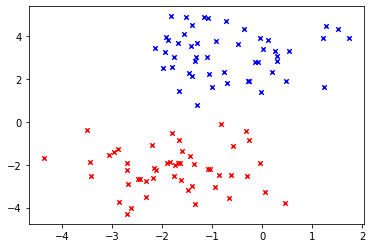

In [ ]:
c0_lin=plt.scatter(X_lin[y_lin==-1,0], X_lin[y_lin==-1,1], s=20, color='r', marker='x')
c1_lin=plt.scatter(X_lin[y_lin==1,0], X_lin[y_lin==1,1], s=20, color='b', marker='x')
plt.show

In [ ]:
for i in range(len(X_lin)):
    for j in range(len(X_lin[0])):
        if i<(len(X_lin)//2) and j==0:
            X_lin[i][j]=X_lin[i][j]+c_lin[0][0]
        elif i<(len(X_lin)//2) and j==1:
            X_lin[i][j]=X_lin[i][j]+c_lin[0][1]
        elif i>(len(X_lin)//2) and j==0:
            X_lin[i][j]=X_lin[i][j]+c_lin[1][0]
        elif i>(len(X_lin)//2) and j==1:
            X_lin[i][j]=X_lin[i][j]+c_lin[1][1]

In [ ]:
x_add_lin = [1 for i in range(100)]
x1_lin = np.array(x_add_lin)
x_lin = np.insert(X_lin, 0, x1_lin, axis=1)
print(x_lin)


y_lin= np.array(y_lin)
print(y_lin)

[[ 1.         -1.85346124 -4.23325765]
 [ 1.         -2.63877561 -2.39252166]
 [ 1.         -1.7499556  -5.61069274]
 [ 1.         -2.66742517 -4.78477206]
 [ 1.         -3.72073244 -4.22281635]
 [ 1.         -3.47347002 -3.17914135]
 [ 1.         -2.85647586 -4.51173984]
 [ 1.         -3.17365036 -4.29974053]
 [ 1.         -2.12343452 -4.83857312]
 [ 1.         -3.30444589 -5.4875106 ]
 [ 1.         -6.17050341 -3.97979626]
 [ 1.         -2.75307739 -5.37557988]
 [ 1.         -1.34775897 -6.08778053]
 [ 1.         -3.57175507 -4.82059871]
 [ 1.         -2.08473438 -3.16405609]
 [ 1.         -3.46256616 -4.25525234]
 [ 1.         -4.50529934 -6.61421132]
 [ 1.         -3.96542574 -4.47706589]
 [ 1.         -2.38722291 -3.43103501]
 [ 1.         -4.00484041 -4.93571761]
 [ 1.         -4.66606656 -6.05343279]
 [ 1.         -5.32378378 -2.68263946]
 [ 1.         -4.12716577 -5.07148916]
 [ 1.         -4.87030895 -3.8559245 ]
 [ 1.         -5.23141144 -4.84615514]
 [ 1.         -4.51298015

In [ ]:
from sklearn.model_selection import train_test_split
X_train_lin, X_test_lin, y_train_lin, y_test_lin = train_test_split(x_lin, y_lin, test_size=0.3,random_state=42)

In [ ]:
print(X_train_lin)

[[ 1.         -0.24214805 -4.53173219]
 [ 1.         -0.75021785 -3.08299401]
 [ 1.         -6.82646781  0.17042718]
 [ 1.         -1.04006703 -3.48709528]
 [ 1.         -8.85170997 -0.0961354 ]
 [ 1.         -0.96254068 -2.33529367]
 [ 1.         -8.42165929 -0.11646992]
 [ 1.         -8.51724271  0.39094872]
 [ 1.         -0.37749369 -3.66058426]
 [ 1.         -1.99437    -5.77036364]
 [ 1.         -0.97967216 -3.38757781]
 [ 1.         -2.01388262 -3.73762178]
 [ 1.         -0.66272102 -3.45589285]
 [ 1.         -9.04018354  0.11875039]
 [ 1.         -1.13476648 -3.3612353 ]
 [ 1.         -1.49391107 -4.09186992]
 [ 1.         -6.79790583 -0.06074923]
 [ 1.         -2.00205081 -3.40266468]
 [ 1.         -8.44189449 -0.29793502]
 [ 1.         -1.06082573 -3.97675102]
 [ 1.         -2.7204821  -4.00230745]
 [ 1.         -0.15649583 -3.94092438]
 [ 1.         -1.4544964  -3.6332182 ]
 [ 1.         -1.9773814  -4.36841684]
 [ 1.          0.38749482 -3.99472544]
 [ 1.         -6.62069071

In [ ]:
print(X_test_lin)

[[ 1.         -8.74754198 -1.69307157]
 [ 1.         -8.16094561 -0.89575529]
 [ 1.         -9.23858422  0.29109123]
 [ 1.         -1.5097612  -2.5671221 ]
 [ 1.         -2.17733687 -2.73511545]
 [ 1.         -1.41813678 -3.73340183]
 [ 1.         -1.61623643 -4.22764148]
 [ 1.         -8.24535908  1.78123158]
 [ 1.         -3.65957407 -3.13594858]
 [ 1.          0.6574681  -3.38940997]
 [ 1.          0.12370643 -2.58718733]
 [ 1.         -1.7790447  -4.14912034]
 [ 1.         -8.66014886  0.96871581]
 [ 1.         -2.7367826  -3.32678492]
 [ 1.         -8.10132054 -1.52325177]
 [ 1.         -1.2098031  -3.37896867]
 [ 1.         -8.49208145 -0.97473901]
 [ 1.         -7.84577916 -0.81177876]
 [ 1.          1.16317037 -5.24393285]
 [ 1.         -1.91973053 -5.51584978]
 [ 1.         -5.87976767  0.75774418]
 [ 1.         -8.5507363  -0.83785025]
 [ 1.         -1.61738939 -4.97019936]
 [ 1.          0.38166794 -1.893678  ]
 [ 1.         -7.35131992 -1.24136198]
 [ 1.         -0.95163683

In [ ]:
print(y_train_lin)

[-1 -1  1 -1  1 -1  1  1 -1 -1 -1 -1 -1  1 -1 -1  1 -1  1 -1 -1 -1 -1 -1
 -1  1 -1  1 -1  1  1  1  1 -1  1  1 -1  1  1  1  1 -1  1 -1  1  1  1 -1
  1  1  1  1 -1 -1 -1  1 -1 -1 -1  1  1  1  1  1 -1  1  1 -1  1  1]


In [ ]:
print(y_test_lin)

[ 1  1  1 -1 -1 -1 -1  1 -1 -1 -1 -1  1 -1  1 -1  1  1 -1 -1  1  1 -1 -1
  1 -1 -1  1 -1  1]


In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
model = LinearRegression()
model.fit(X_train_lin, y_train_lin)
w = model.coef_
b = model.intercept_
print(b)
print(w)

0.051899855113901584
[0.         0.0775033  0.16300936]


In [ ]:
m = -(b / w[1]) / (b / w[0])
c= -b / w[1]
x4,y4= line(m,c,15)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in double_scalars
  """Entry point for launching an IPython kernel.


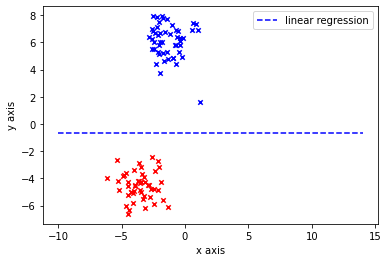

In [ ]:
plt.plot(x4, y4, '--',label='linear regression', color='blue')
plt.scatter(X_lin[y_lin==-1,0], X_lin[y_lin==-1,1], s=20, color='r', marker='x')
plt.scatter(X_lin[y_lin==1,0], X_lin[y_lin==1,1], s=20, color='b', marker='x')
plt.xlabel("x axis")
plt.ylabel("y axis")
plt.legend()
plt.show()

In [ ]:
from sklearn import metrics

In [ ]:
y_pred = model.predict(X_test_lin)
y_pred = np.where(y_pred < 0, -1, y_pred)
y_pred = np.where(y_pred > 0, 1, y_pred)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test_lin, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test_lin, y_pred))

Mean Absolute Error: 0.0
Mean Squared Error: 0.0


In [ ]:
test_list_lin = np.insert(X_test_lin, 3, y_test_lin, axis=1)
print(test_list_lin)

[[ 1.         -8.74754198 -1.69307157  1.        ]
 [ 1.         -8.16094561 -0.89575529  1.        ]
 [ 1.         -9.23858422  0.29109123  1.        ]
 [ 1.         -1.5097612  -2.5671221  -1.        ]
 [ 1.         -2.17733687 -2.73511545 -1.        ]
 [ 1.         -1.41813678 -3.73340183 -1.        ]
 [ 1.         -1.61623643 -4.22764148 -1.        ]
 [ 1.         -8.24535908  1.78123158  1.        ]
 [ 1.         -3.65957407 -3.13594858 -1.        ]
 [ 1.          0.6574681  -3.38940997 -1.        ]
 [ 1.          0.12370643 -2.58718733 -1.        ]
 [ 1.         -1.7790447  -4.14912034 -1.        ]
 [ 1.         -8.66014886  0.96871581  1.        ]
 [ 1.         -2.7367826  -3.32678492 -1.        ]
 [ 1.         -8.10132054 -1.52325177  1.        ]
 [ 1.         -1.2098031  -3.37896867 -1.        ]
 [ 1.         -8.49208145 -0.97473901  1.        ]
 [ 1.         -7.84577916 -0.81177876  1.        ]
 [ 1.          1.16317037 -5.24393285 -1.        ]
 [ 1.         -1.91973053 -5.51

In [ ]:
eout_lin=outerror(w,test_list_lin,X_test_lin,y_test_lin,2)
print(eout_lin)

4


In [ ]:
print(w)

[ 0.         -0.19661914  0.13557604]


pocket algo

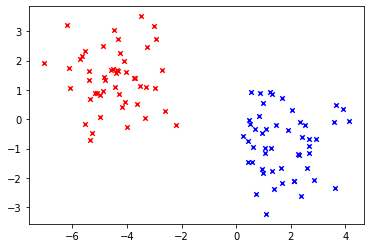

In [ ]:
c_poc = 3 * np.random.normal(0, 1, (2, 2))
X_poc, y_poc = make_blobs(n_samples=100, centers=c_poc , n_features=2, cluster_std=1.0, shuffle=False , random_state=0)
y_poc[y_poc==0] = -1


c0_poc=plt.scatter(X_poc[y_poc==-1,0], X_poc[y_poc==-1,1], s=20, color='r', marker='x')
c1_poc=plt.scatter(X_poc[y_poc==1,0], X_poc[y_poc==1,1], s=20, color='b', marker='x')


for i in range(len(X_poc)):
    for j in range(len(X_poc[0])):
        if i<(len(X_poc)//2) and j==0:
            X_poc[i][j]=X_poc[i][j]+c_poc[0][0]
        elif i<(len(X_poc)//2) and j==1:
            X_poc[i][j]=X_poc[i][j]+c_poc[0][1]
        elif i>(len(X_poc)//2) and j==0:
            X_poc[i][j]=X_poc[i][j]+c_poc[1][0]
        elif i>(len(X_poc)//2) and j==1:
            X_poc[i][j]=X_poc[i][j]+c_poc[1][1]

In [ ]:
x_add_poc = [1 for i in range(100)]
x1_poc = np.array(x_add_poc)
x_poc = np.insert(X_poc, 0, x1_poc, axis=1)
print(x_poc)


y_poc= np.array(y_poc)
print(y_poc)

[[  1.          -7.20313363   2.94507811]
 [  1.          -7.98844799   4.7858141 ]
 [  1.          -7.09962799   1.56764302]
 [  1.          -8.01709756   2.39356369]
 [  1.          -9.07040483   2.9555194 ]
 [  1.          -8.82314241   3.99919441]
 [  1.          -8.20614825   2.66659592]
 [  1.          -8.52332274   2.87859523]
 [  1.          -7.4731069    2.33976264]
 [  1.          -8.65411827   1.69082516]
 [  1.         -11.52017579   3.1985395 ]
 [  1.          -8.10274978   1.80275588]
 [  1.          -6.69743135   1.09055522]
 [  1.          -8.92142746   2.35773705]
 [  1.          -7.43440676   4.01427967]
 [  1.          -8.81223855   2.92308342]
 [  1.          -9.85497172   0.56412443]
 [  1.          -9.31509813   2.70126987]
 [  1.          -7.7368953    3.74730075]
 [  1.          -9.35451279   2.24261815]
 [  1.         -10.01573894   1.12490296]
 [  1.         -10.67345617   4.49569629]
 [  1.          -9.47683816   2.1068466 ]
 [  1.         -10.21998134   3.32

In [ ]:
from sklearn.model_selection import train_test_split
X_train_poc, X_test_poc, y_train_poc, y_test_poc = train_test_split(x_poc, y_poc, test_size=0.3,random_state=42)

In [ ]:
train_list_poc = np.insert(X_train_poc, 3, y_train_poc, axis=1)
print(train_list_poc)

[[  1.          -8.10274978   1.80275588  -1.        ]
 [  1.          -8.61081958   3.25149407  -1.        ]
 [  1.           4.3882076   -1.68349446   1.        ]
 [  1.          -8.90066875   2.8473928   -1.        ]
 [  1.           2.36296543  -1.95005703   1.        ]
 [  1.          -8.82314241   3.99919441  -1.        ]
 [  1.           2.79301611  -1.97039155   1.        ]
 [  1.           2.6974327   -1.46297292   1.        ]
 [  1.          -8.23809541   2.67390381  -1.        ]
 [  1.          -9.85497172   0.56412443  -1.        ]
 [  1.          -8.84027388   2.94691026  -1.        ]
 [  1.          -9.87448434   2.5968663   -1.        ]
 [  1.          -8.52332274   2.87859523  -1.        ]
 [  1.           2.17449186  -1.73517124   1.        ]
 [  1.          -8.9953682    2.97325277  -1.        ]
 [  1.          -9.35451279   2.24261815  -1.        ]
 [  1.           4.41676958  -1.91467087   1.        ]
 [  1.          -9.86265254   2.9318234   -1.        ]
 [  1.    

In [ ]:
def pocket(w_list,n_list, d, n, X_train,y_train):
    w_pocket=[]
    count=0
    
    while count <1000:
        for i in range(len(X_train)):
            x_i=n_list[i]
            activation=0
            for j in range(d+1):
                activation= activation+w_list[j]*x_i[j]
                
                if activation >= 0:
                    y_pred = 1
                else:
                    y_pred = -1
                
                if y_pred != x_i[d+1]:
                    w_list=[(w_list[k] + x_i[d+1]* x_i[k]) for k in range(d+1)]
                    error=sampleError(w_list,n_list,X_train,y_train,d)
                    if error<n:
                        w_pocket=w_list[:]
                        n=error
        count=count+1
    return(w_pocket,n) 

In [ ]:
l= len(X_train_poc)
w_pocket_1,error_poc1=pocket(w,train_list_poc,2,l, X_train_poc,y_train_poc)

In [ ]:
print(w_pocket_1)

[-1.0, 7.9061306392356165, -1.6671798390260137]


In [ ]:
print(error_poc1)

0


In [ ]:
test_list_poc = np.insert(X_test_poc, 3, y_test_poc, axis=1)
print(test_list_poc)

[[  1.           2.46713343  -3.54699321   1.        ]
 [  1.           3.05372979  -2.74967692   1.        ]
 [  1.           1.97609118  -1.56283041   1.        ]
 [  1.          -9.37036292   3.76736597  -1.        ]
 [  1.         -10.0379386    3.59937263  -1.        ]
 [  1.          -9.27873851   2.60108624  -1.        ]
 [  1.          -9.47683816   2.1068466   -1.        ]
 [  1.           2.96931632  -0.07269006   1.        ]
 [  1.         -11.52017579   3.1985395   -1.        ]
 [  1.          -7.20313363   2.94507811  -1.        ]
 [  1.          -7.7368953    3.74730075  -1.        ]
 [  1.          -9.63964642   2.18536774  -1.        ]
 [  1.           2.55452655  -0.88520582   1.        ]
 [  1.         -10.59738432   3.00770316  -1.        ]
 [  1.           3.11335486  -3.3771734    1.        ]
 [  1.          -9.07040483   2.9555194   -1.        ]
 [  1.           2.72259395  -2.82866065   1.        ]
 [  1.           3.36889625  -2.6657004    1.        ]
 [  1.    

In [ ]:
error_poc2= outerror(w_pocket_1,test_list_poc,X_test_poc,y_test_poc,2)
print(error_poc2)

0


Question 2

In [25]:
import numpy as np
import random
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from statistics import mean
import warnings
import math

In [26]:
c = 3 * np.random.normal (0,1 , (2 , 2))
x, y = make_blobs(n_samples=100, centers=c , n_features =2, cluster_std =1.0 , shuffle=False , random_state=0)
x_new = [1 for i in range(100)]
x_n = np.array(x_new)
y=np.where(y==0,-1,y)
x = np.insert(x, 0, x_n, axis=1)

In [27]:
print(x)

[[ 1.00000000e+00 -7.75570254e-01  3.41157926e-01]
 [ 1.00000000e+00 -1.56088462e+00  2.18189392e+00]
 [ 1.00000000e+00 -6.72064610e-01 -1.03627716e+00]
 [ 1.00000000e+00 -1.58953418e+00 -2.10356490e-01]
 [ 1.00000000e+00 -2.64284145e+00  3.51599220e-01]
 [ 1.00000000e+00 -2.39557903e+00  1.39527422e+00]
 [ 1.00000000e+00 -1.77858488e+00  6.26757345e-02]
 [ 1.00000000e+00 -2.09575937e+00  2.74675045e-01]
 [ 1.00000000e+00 -1.04554353e+00 -2.64157546e-01]
 [ 1.00000000e+00 -2.22655490e+00 -9.13095021e-01]
 [ 1.00000000e+00 -5.09261242e+00  5.94619313e-01]
 [ 1.00000000e+00 -1.67518640e+00 -8.01164302e-01]
 [ 1.00000000e+00 -2.69867976e-01 -1.51336496e+00]
 [ 1.00000000e+00 -2.49386408e+00 -2.46183132e-01]
 [ 1.00000000e+00 -1.00684339e+00  1.41035949e+00]
 [ 1.00000000e+00 -2.38467517e+00  3.19163238e-01]
 [ 1.00000000e+00 -3.42740835e+00 -2.03979575e+00]
 [ 1.00000000e+00 -2.88753475e+00  9.73496871e-02]
 [ 1.00000000e+00 -1.30933192e+00  1.14338057e+00]
 [ 1.00000000e+00 -2.92694942e+

In [28]:
print(y)

[-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1]


In [29]:
def sigmoid(gamma):
     warnings.filterwarnings('ignore')
     if gamma < 0:
        return 1 - 1 / (1 + math.exp(gamma))
     else:
        return 1 / (1 + math.exp(-gamma))

In [30]:
def Eout(w,X_test,y_test):
    miss=0
    hx=0
    for i in range(len(X_test)):
        for j in range(len(X_test[i])):
            hx+=X_test[i][j]*w[j]
        h=sigmoid(hx)
        if h>0.5:
            h=1
        else:
            h=-1
        if h!=y_test[i]:
            miss+=1
    return miss

In [41]:
ein,eout,flag=([] for i in range(3))

In [32]:
for i in range(5):    
    X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3)
    w_list = []
    g_list = []
    for i in range(3):
        w_list.append(0.0)
        g_list.append(0.0)

    t = 0
    e_in=len(X_train)
    while t < 500:
        for j in range(len(g_list)):
            g_list[j] = 0
        for i in range(len(X_train)):
            v = 0
            for j in range(len(w_list)):
                v += (w_list[j] * X_train[i][j])
            v = y_train[i] * v
            v = sigmoid(v)
            for j in range(len(w_list)):
                g_list[j] += ((y_train[i] * X_train[i][j]) * v)
        for j in range(len(g_list)):
            g_list[j] = - (g_list[j])
            w_list[j] = w_list[j] - 0.00001 * g_list[j]
        new_e_in=Eout(w_list,X_train,y_train)
        if t!=1 and abs(new_e_in-e_in)<=0.0005:
            break
        else:
            e_in=new_e_in
        t += 1

 
    m=Eout(w_list,X_test,y_test)
    im=Eout(w_list,X_train,y_train)
    ein.append(im)
    eout.append(m)
    flag.append(t)
   

In [33]:
print("Ein: ",ein)
print("Eout: ",eout)
print(t)

Ein:  [28, 33, 26, 34, 37]
Eout:  [18, 16, 18, 15, 11]
2


In [34]:
print(w_list)

[5.982078549171947e-05, 0.0012844178822717356, -0.0006550882800053898]


In [36]:
for i in range(5):    
    X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3)
    w_list = []
    g_list = []
    for i in range(3):
        w_list.append(0.0)
        g_list.append(0.0)

    t = 0
    e_in=len(X_train)
    while t < 500:
        for j in range(len(g_list)):
            g_list[j] = 0
        for i in range(len(X_train)):
            v = 0
            for j in range(len(w_list)):
                v += (w_list[j] * X_train[i][j])
            v = y_train[i] * v
            v = sigmoid(v)
            for j in range(len(w_list)):
                g_list[j] += ((y_train[i] * X_train[i][j]) * v)
        for j in range(len(g_list)):
            g_list[j] = - (g_list[j])
            w_list[j] = w_list[j] - 0.001 * g_list[j]
        new_e_in=Eout(w_list,X_train,y_train)
        if t!=1 and abs(new_e_in-e_in)<=0.0005:
            break
        else:
            e_in=new_e_in
        t += 1

 
    m=Eout(w_list,X_test,y_test)
    im=Eout(w_list,X_train,y_train)
    ein.append(im)
    eout.append(m)
    flag.append(t)

In [37]:
print("Ein: ",ein)
print("Eout: ",eout)
print(t)
print(w_list)

Ein:  [36, 35, 33, 31, 34]
Eout:  [14, 13, 17, 15, 12]
2
[0.007886081027289748, 0.1424570183184086, -0.07899488142306113]


In [39]:
for i in range(5):    
    X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3)
    w_list = []
    g_list = []
    for i in range(3):
        w_list.append(0.0)
        g_list.append(0.0)

    t = 0
    e_in=len(X_train)
    while t < 500:
        for j in range(len(g_list)):
            g_list[j] = 0
        for i in range(len(X_train)):
            v = 0
            for j in range(len(w_list)):
                v += (w_list[j] * X_train[i][j])
            v = y_train[i] * v
            v = sigmoid(v)
            for j in range(len(w_list)):
                g_list[j] += ((y_train[i] * X_train[i][j]) * v)
        for j in range(len(g_list)):
            g_list[j] = - (g_list[j])
            w_list[j] = w_list[j] - 0.05 * g_list[j]
        new_e_in=Eout(w_list,X_train,y_train)
        if t!=1 and abs(new_e_in-e_in)<=0.0005:
            break
        else:
            e_in=new_e_in
        t += 1

 
    m=Eout(w_list,X_test,y_test)
    im=Eout(w_list,X_train,y_train)
    ein.append(im)
    eout.append(m)
    flag.append(t)

In [40]:
print("Ein: ",ein)
print("Eout: ",eout)
print(t)
print(w_list)

Ein:  [35, 35, 29, 34, 31]
Eout:  [11, 13, 15, 15, 16]
2
[-1.559030353299466, 11.514978682589879, -4.659004856375123]


In [42]:
for i in range(5):    
    X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3)
    w_list = []
    g_list = []
    for i in range(3):
        w_list.append(0.0)
        g_list.append(0.0)

    t = 0
    e_in=len(X_train)
    while t < 500:
        for j in range(len(g_list)):
            g_list[j] = 0
        for i in range(len(X_train)):
            v = 0
            for j in range(len(w_list)):
                v += (w_list[j] * X_train[i][j])
            v = y_train[i] * v
            v = sigmoid(v)
            for j in range(len(w_list)):
                g_list[j] += ((y_train[i] * X_train[i][j]) * v)
        for j in range(len(g_list)):
            g_list[j] = - (g_list[j])
            w_list[j] = w_list[j] - 0.005 * g_list[j]
        new_e_in=Eout(w_list,X_train,y_train)
        if t!=1 and abs(new_e_in-e_in)<=0.0005:
            break
        else:
            e_in=new_e_in
        t += 1

 
    m=Eout(w_list,X_test,y_test)
    im=Eout(w_list,X_train,y_train)
    ein.append(im)
    eout.append(m)
    flag.append(t)

In [62]:
print("Ein: ",ein)
print("Eout: ",eout)
print(flag)
print(w_list)

Ein:  [31, 31, 33, 34, 35]
Eout:  [13, 15, 17, 15, 9]
[2, 2, 2, 2, 2]
[-0.06428944861858799, 0.916928050658274, -0.4108697963336292]


linear

In [44]:
def linEout(X_test,y_test,lm_coef_):
    miss=0
    for i in range(len(X_test)):
        h=0
        for j in range(len(X_test[i])):
                h+=lm_coef_[j]*X_test[i][j]
            #print(h)
                if h>0:
                    h=1
                else:
                    h=-1
                if h!=y_test[i]:
                    miss+=1
        return miss

In [51]:
ein_lin,eout_lin=([] for i in range(2))

In [52]:
c = 3 * np.random.normal (0,1 , (2 , 2))
x, y = make_blobs(n_samples=100, centers=c , n_features =2, cluster_std =1.0 , shuffle=False , random_state=0)
x_new = [1 for i in range(100)]
x_n = np.array(x_new)
y=np.where(y==0,-1,y)
x = np.insert(x, 0, x_n, axis=1)

In [53]:

for i in range(5):
    X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3)
    model = LinearRegression()
    model.fit(X_train, y_train)
    miss=linEout(X_test,y_test,model.coef_)
    in_miss=linEout(X_train,y_train,model.coef_)
    ein_lin.append(in_miss)
    eout_lin.append(miss)

In [54]:
print(model.coef_)
print(ein_lin)
print(eout_lin)

[ 0.         -0.22202882 -0.31095453]
[0, 0, 3, 0, 0]
[3, 0, 0, 3, 3]


Pocket

In [55]:
def sampleError(w_list,n_list,X_train,y_train,d):
    miss=0
    for i in range(len(X_train)):
        x_i=n_list[i]
        activation=0
        for j in range(d+1):
            activation= activation+w_list[j]*x_i[j]
            if activation >= 0:
                y_pred = 1
            else:
                y_pred = -1
        if y_pred!=y_train[i]:
            miss+=1
    return miss 

In [56]:
def pocket(n_list, d, n, X_train,y_train,limit):
    w_list=[]
    w_pocket=[]
    for i in range(d+1):
        w_list.append(0.0)
    count=0
    #update=0
    
    while count <limit:
        for i in range(len(X_train)):
            x_i=n_list[i]
            activation=0
            for j in range(d+1):
                activation= activation+w_list[j]*x_i[j]
                
                if activation >= 0:
                    y_pred = 1
                else:
                    y_pred = -1
                
                if y_pred != x_i[d+1]:
                    w_list=[(w_list[k] + x_i[d+1]* x_i[k]) for k in range(d+1)]
                    error=sampleError(w_list,n_list,X_train,y_train,d)
                    if error<n:
                        w_pocket=w_list[:]
                        n=error
        count=count+1
    return(w_pocket,n) 

In [57]:
def outerror(w_list,n_list,X_test,y_test,d):
    miss=0
    for i in range(len(X_test)):
        x_i=n_list[i]
        activation=0
        for j in range(d+1):
            activation= activation+w_list[j]*x_i[j]
            if activation >= 0:
                y_pred = 1
            else:
                y_pred = -1
        if y_pred!=y_test[i]:
            miss+=1
    return miss

In [58]:
c = 3 * np.random.normal (0,1 , (2 , 2))
x, y = make_blobs(n_samples=100, centers=c , n_features =2, cluster_std =1.0 , shuffle=False , random_state=0)
x_new = [1 for i in range(100)]
x_n = np.array(x_new)
y=np.where(y==0,-1,y)
x = np.insert(x, 0, x_n, axis=1)

In [59]:
ein_pok,eout_pok=([] for i in range(2))

In [60]:
for i in range(5):
    X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=0)
    train_list = np.insert(X_train, 3, y_train, axis=1)
    l= len(X_train)
    w_pocket,inpok=pocket(train_list,2,l, X_train,y_train, 100)
    test_list = np.insert(X_test, 3, y_test, axis=1)
    outpok= outerror(w_pocket,test_list,X_test,y_test,2)
    ein_pok.append(inpok)
    eout_pok.append(outpok)

In [61]:
print(ein_pok)
print(eout_pok)

[0, 0, 0, 0, 0]
[0, 0, 0, 0, 0]
